# BME-1312 Lab-0: Construct your CNN for classification


In [2]:
######################## WRITE YOUR ANSWER BELOW ########################
STUDENT_NAME = "Renyi Yang"
STUDENT_NUMBER = "2023533030"
#########################################################################

## Setup environments

You are required to install the following packages.

- jupyter
- scikit-image
- numPy
- pytorch torchvision
- matplotlib
- tqdm


In [3]:
# Necessary packages for this homework, you are free to import more.
import numpy as np
from matplotlib import pyplot as plt
import torch
from torch import nn
from torch import functional as F
from torchvision import transforms, datasets
from torch.utils.data import DataLoader

# Progress bar
from tqdm import tqdm

## Part 1: Warm up

In part-1, you will learn the basic operations to complete the deep learning MRI reconstruction using PyTorch and NumPy. You can skip this part if you are already familiar with the topics.

Some learning materials:

- [NumPy: the absolute basics for beginners](https://numpy.org/doc/1.22/user/absolute_beginners.html)
- [PyTorch Official Tutorials](https://pytorch.org/tutorials/)

Official documents of NumPy and PyTorch:

- [NumPy API Reference](https://numpy.org/doc/1.22/reference/index.html#reference)
- [PyTorch API Reference](https://pytorch.org/docs/stable/index.html)


### Part 1A: Tensor/ndarray Operations

In this section, you are required to be capable of manipulating mult-dimensions array, i.e. `numpy.ndarray` in NumPy and `torch.Tensor` in PyTorch. Most operations of ndarray and tensor are similar, you can find PyTorch tensor's API once you understand the usage of `ndarray` in numpy.

Learning material:

- [图解 Python numpy 基本操作 - 知乎](https://zhuanlan.zhihu.com/p/396444973)

#### Numpy ndarray


Min-Max:

$$
x_i' = \frac{x_i - x_\mathrm{min}}{x_\mathrm{max} - x_\mathrm{min}}
$$

Standard Normalization:

$$
x_i' = \frac{x_i - \mathrm{mean}(X)}{\mathrm{std}(X)}
$$


In [4]:
# generate random image by normal distribution
def random_image():

    # hint:np.random.randn()
    ######################## WRITE YOUR ANSWER BELOW ########################
    img = np.random.randn(1, 256, 256)
    return img
    #########################################################################


x = random_image()
assert x.shape == (1, 256, 256)

In [5]:
# Min-Max Normalization
x = random_image()

######################## WRITE YOUR ANSWER BELOW ########################
x = (x - x.min()) / (x.max() - x.min())
########################################################################
assert np.abs(x.min()) < 1e-8
assert np.abs(x.max() - 1.0) < 1e-8

# standard normalization
x = random_image()
######################## WRITE YOUR ANSWER BELOW ########################
x = (x - x.mean()) / x.std()
########################################################################
assert np.abs(np.mean(x)) < 1e-8
assert np.abs(np.std(x) - 1.0) < 1e-8

In [6]:
# Concatenate and Stack on the axis-0
x1 = random_image()
x2 = random_image()

# hint:np.concatenate,np.stack
######################## WRITE YOUR ANSWER BELOW ########################
x_concate = np.concatenate([x1, x2], axis=0)
x_stack = np.stack([x1, x2], axis=0)
########################################################################
assert x_concate.shape == (2, 256, 256)
assert x_stack.shape == (2, 1, 256, 256)

In [7]:
# Swap row-1 and row-2 of x in one line. Hint: fancy indexing, array[[]]
x = np.arange(4).reshape(2, 2)
######################## WRITE YOUR ANSWER BELOW ########################
x[[0, 1]] = x[[1, 0]]
########################################################################
assert np.all(x == np.array([[2, 3], [0, 1]]))

#### PyTorch tensor

Try the same tasks in PyTorch's `Tensor`.


In [8]:
# generate random image by normal distribution
def random_image():
    ######################## WRITE YOUR ANSWER BELOW ########################
    img = torch.randn(1, 256, 256)
    return img
    ########################################################################


x = random_image()
assert x.shape == (1, 256, 256)
assert isinstance(x, torch.Tensor)

# Min-Max Normalization
x = random_image()
######################## WRITE YOUR ANSWER BELOW ########################
x = (x - x.min()) / (x.max() - x.min())
########################################################################
assert torch.abs(x.min()) < 1e-5
assert torch.abs(x.max() - 1.0) < 1e-5

# standard normalization
x = random_image()
######################## WRITE YOUR ANSWER BELOW ########################
x = (x - x.mean()) / x.std()
########################################################################
assert torch.abs(torch.mean(x)) < 1e-5
assert torch.abs(torch.std(x) - 1.0) < 1e-5

# Concatenate and Stack on the axis-0
x1 = random_image()
x2 = random_image()
######################## WRITE YOUR ANSWER BELOW ########################
x_concate = torch.cat([x1, x2], dim=0)
x_stack = torch.stack([x1, x2], dim=0)
########################################################################
assert x_concate.shape == (2, 256, 256)
assert x_stack.shape == (2, 1, 256, 256)

# Swap row-1 and row-2 of x in one line
x = torch.arange(4).reshape(2, 2)
######################## WRITE YOUR ANSWER BELOW ########################
x[[0, 1]] = x[[1, 0]]
########################################################################
assert torch.all((x - torch.tensor([[2, 3], [0, 1]])) < 1e-5)

### Part 1B: Train MLP in PyTorch

In this section, you will learn the basic pipeline of training a network in PyTorch.

1. Define your model
2. Perform the forward propagation
3. Perform the backward propagation, then optimize by one step based on the gradients


In [9]:
def one_optimize_step(inputs, ground_truth, model, criterion, optimizer):
    # forward propagation. Hint: feed batch into the network
    ######################## WRITE YOUR ANSWER BELOW ########################
    outputs = model(inputs)
    ########################################################################

    # backward. Hint: compute loss, clear the gradients, perform backward propagation
    ######################## WRITE YOUR ANSWER BELOW ########################
    loss = criterion(outputs, ground_truth)
    optimizer.zero_grad()
    loss.backward()
    ########################################################################

    # optimize. Hint: .step() function
    ######################## WRITE YOUR ANSWER BELOW ########################
    optimizer.step()
    ########################################################################

    return loss


# Test your optimize_step
model = nn.Linear(1, 1)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)
x = torch.arange(0, 10, step=0.01).reshape(-1, 1)  # [N_batch, 1]
y = torch.sin(x).reshape(-1, 1)  # [N_batch, 1]
loss = one_optimize_step(x, y, model, criterion, optimizer)
print(loss)

tensor(10.9497, grad_fn=<MseLossBackward0>)


Loss in epoch-010: 5.35e-02
Loss in epoch-020: 1.33e-02
Loss in epoch-030: 3.17e-03
Loss in epoch-040: 2.32e-04
Loss in epoch-050: 3.08e-04
Loss in epoch-060: 3.06e-04
Loss in epoch-070: 3.51e-04
Loss in epoch-080: 3.17e-04
Loss in epoch-090: 6.02e-05
Loss in epoch-100: 6.22e-06


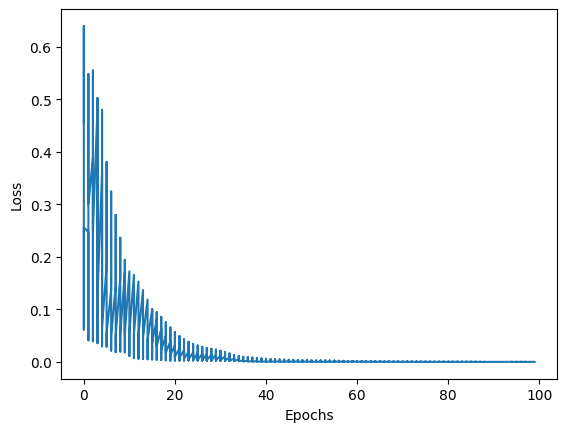

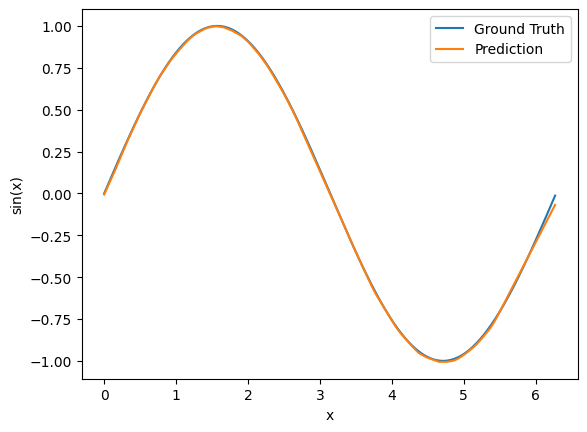

In [10]:
# Fit y=sin(x) using MLP, tune training paramter to get a plausible result
# We encourage you to tune the learning rate exponentially. For example, you can try 0.1, 0.01, 0.001, 0.0001, 0.00001
LEARNING_RATE = 0.001
BATCH_SIZE = 20  # range from 0~1000

model = nn.Sequential(nn.Linear(1, 1024), nn.ReLU(), nn.Linear(1024, 1))
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(
    params=model.parameters(), lr=LEARNING_RATE, weight_decay=1e-6
)

# Example Data for training
x = np.arange(0, 6.28, step=0.01).reshape(-1, 1)  # [N_batch, 1]
y = np.sin(x).reshape(-1, 1)  # [N_batch, 1]
NUM_DATA_POINTS = x.shape[0]

# We always shuffle the data when the stochasitc gradient descend is used
shuffle_indices = np.arange(0, NUM_DATA_POINTS)
np.random.shuffle(shuffle_indices)
x_shuffled = torch.tensor(x[shuffle_indices], dtype=torch.float32)
y_shuffled = torch.tensor(y[shuffle_indices], dtype=torch.float32)

NUM_EPOCHS = 100
LOG_STEP = 10

# Training loop, optimization steps are performed by multiple times.
epoch_list = []
loss_list = []
for epoch in range(NUM_EPOCHS):
    for start_idx in range(0, NUM_DATA_POINTS, BATCH_SIZE):
        # Fetch part of whole dataset
        x_batch = x_shuffled[start_idx : start_idx + BATCH_SIZE]
        y_batch = y_shuffled[start_idx : start_idx + BATCH_SIZE]
        ######################## WRITE YOUR ANSWER BELOW ########################
        loss = one_optimize_step(x_batch, y_batch, model, criterion, optimizer)
        ########################################################################
        loss_value = loss.item()  # Conver pytorch tensor into python number
        epoch_list.append(epoch)
        loss_list.append(loss_value)
    if (epoch + 1) % LOG_STEP == 0 or epoch == NUM_EPOCHS - 1:
        print(f"Loss in epoch-{epoch + 1:#0{len(str(NUM_EPOCHS))}d}: {loss_value:.2e}")

# Show losses
plt.figure()
plt.plot(epoch_list, loss_list)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# plot the prediction and the ground truth
y_pred = model(torch.tensor(x, dtype=torch.float32)).detach().numpy()
plt.figure()
plt.plot(x, y, label="Ground Truth")
plt.plot(x, y_pred, label="Prediction")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.legend()
plt.show()

plt.close("all")

What is your conclusion for tunning the learning rate?

$\large \color{#2196f3}{Answer:}$

- Too high learning rates (e.g., 0.1) can cause training instability or divergence where the model fails to converge
- Too low learning rates (e.g., 0.00001) result in very slow convergence
- 0.01 fits well

What is the relationship between epoch, batch size, sample size and iteration?

$\large \color{#2196f3}{Answer:}$

Sample size: The total number of examples in the dataset

Batch size: Number of samples processed in one forward/backward pass (20)

Iteration: One update of model parameters using one batch of data

Epoch: One complete pass through the entire dataset

- Number of iterations per epoch = Sample size / Batch size
- Total iterations = Number of epochs \* (Sample size / Batch size)


## Part 2: Understand MNIST data

### Part 2A: Data loading

The MNIST dataset consists of 70000 28x28 gray images in 10 classes. There are 60000 training images and 10000 test images.

We load the MNIST dataset and perform preprocessing to prepare it for training.


In [11]:
# Transform the data into torch tensor and normalize it to mu=0, std=1
data_tf = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]
)
# Load MNIST dataset
train_dataset = datasets.MNIST(
    root="./data", train=True, transform=data_tf, download=True
)
test_dataset = datasets.MNIST(
    root="./data", train=False, transform=data_tf, download=True
)
# Show the shape of the dataset
X_train, Y_train = train_dataset.data, train_dataset.targets
X_test, Y_test = test_dataset.data, test_dataset.targets
print("Training data shape:\t", X_train.shape)
print("Training labels shape:\t", Y_train.shape)
print("Test data shape:\t", X_test.shape)
print("Test labels shape:\t", Y_test.shape)

Training data shape:	 torch.Size([60000, 28, 28])
Training labels shape:	 torch.Size([60000])
Test data shape:	 torch.Size([10000, 28, 28])
Test labels shape:	 torch.Size([10000])


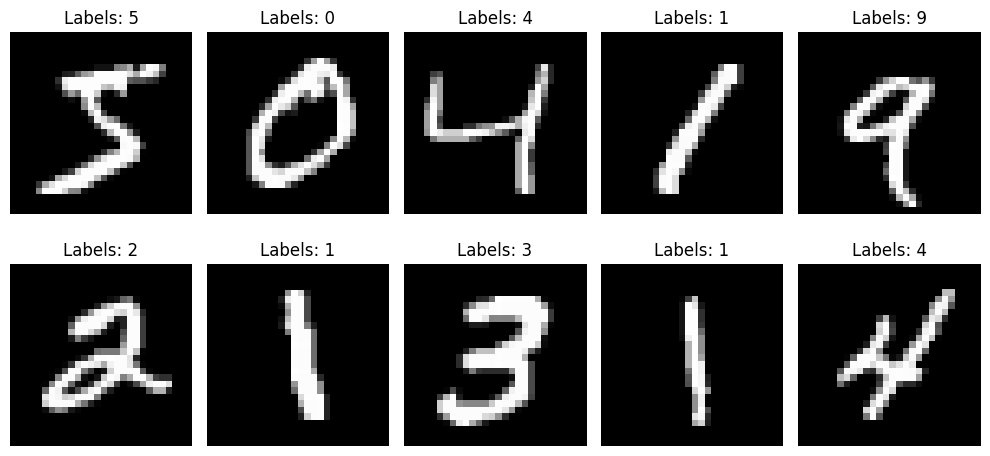

In [12]:
# Show some images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Labels: {Y_train[i].item()}")
    plt.axis("off")
plt.tight_layout()
plt.show()

### Part 2B: Prepare dataset loaders

Two data loaders will be used in the following training, validation and testing phases. You need to understand the usage of `torch.utils.data.DataLoader` and build `test_loader` by yourself.


In [13]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)
######################## WRITE YOUR ANSWER BELOW ########################
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=4)
########################################################################

## Part 3: Build your CNN


### Part 3A: Define a simple CNN

Use the knowledge you learned from this course to build a simple CNN. We will show you the model architecture.

A schematic illustration of the network you need to implement:

<center>
<img src="./assets/Lenet.png" width=600pt>
</center>

You may use the following information:

- convolution: nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0)
- activation function: nn.ReLU()
- max pooling: nn.MaxPool2d(kernel_size,stride=kernel_size,padding=0)
- linear：nn.Linear(in_features, out_features, bias=True)
- flatten: nn.Flatten(start_dim=1, end_dim=-1)

The input_size: (batch_size, 1, 28, 28)
The output_size: (batch_size, 10)


In [14]:
# Define Network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        ######################## WRITE YOUR ANSWER BELOW ########################
        self.conv1 = nn.Conv2d(1, 6, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0)
        self.fc1 = nn.Linear(16 * 5 * 5, 120, bias=True)
        self.fc2 = nn.Linear(120, 84, bias=True)
        self.fc3 = nn.Linear(84, 10, bias=True)
        ########################################################################

    def forward(self, x):
        ######################## WRITE YOUR ANSWER BELOW ########################
        x = nn.ReLU()(self.conv1(x))
        x = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)(x)
        x = nn.ReLU()(self.conv2(x))
        x = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)(x)
        x = nn.Flatten(start_dim=1, end_dim=-1)(x)
        x = nn.ReLU()(self.fc1(x))
        x = nn.ReLU()(self.fc2(x))
        x = nn.ReLU()(self.fc3(x))
        ########################################################################
        return x


model_test = SimpleNN()
X = torch.rand(size=(64, 1, 28, 28), dtype=torch.float32)
# Test the forward function
Y = model_test(X)
assert Y.shape == (64, 10)

### Part 3B: Define your Loss function

Implement a CrossEntropy Loss function. $y_i$ is the ground truth label. $\hat{y}_i$ is your NN's output. $N$ is the batch_size.

$$
L_\text{CE} = -\frac{1}{N} \sum_{i=1}^N y_i \cdot \log(\hat{y}_i), \quad i = 1, \cdots, N
$$


In [15]:
class CrossEntropyLossCustom:
    def __init__(self):
        pass

    def softmax(self, x):
        """Calculate softmax: change logits into probabilities."""
        exp_x = torch.exp(x)
        exp_x_sum = torch.sum(exp_x, dim=1, keepdim=True)
        return exp_x / exp_x_sum

    def forward(self, outputs, targets):
        """
        Calculate cross entropy loss
        args:
        outputs: model output(logits), shape (batch_size, num_classes)
        targets: ground truth labels, shape (batch_size)

        return:
        loss: cross entropy loss
        """

        # 1. Change logits into probabilities
        ######################## WRITE YOUR ANSWER BELOW ########################
        probs = self.softmax(outputs)
        #########################################################################

        # 2. Get the log probability
        ######################## WRITE YOUR ANSWER BELOW ########################
        log_probs = torch.log(probs)
        #########################################################################

        # 3. Get loss
        batch_size = outputs.shape[0]
        ######################## WRITE YOUR ANSWER BELOW ########################
        loss = -torch.sum(log_probs[range(batch_size), targets]) / batch_size
        #########################################################################

        return loss


def test_your_loss():
    logits = torch.tensor([[1.0, 2.0, 3.0], [1.0, 2.0, 3.0]])
    targets = torch.tensor([1, 2])

    custom_loss_func = CrossEntropyLossCustom()
    gt_loss_func = nn.CrossEntropyLoss()

    custom_loss = custom_loss_func.forward(logits, targets)
    gt_loss = gt_loss_func(logits, targets)

    assert torch.allclose(
        custom_loss, gt_loss, atol=1e-6
    ), f"Custom loss {custom_loss} != GT loss {gt_loss}"
    print(
        f"Your Custom Loss is: {custom_loss:06f} while the GT Loss is: {gt_loss:06f}. Test Passed!"
    )


test_your_loss()

Your Custom Loss is: 0.907606 while the GT Loss is: 0.907606. Test Passed!


### Part 3C: Train&Test the Network


The train function and most of test function are given, All you need is to get the predicted label.


In [16]:
def train(model, dataloader, optimizer, loss_fn, num_epoch):
    model.train()
    for epoch in range(num_epoch):
        running_loss = 0.0
        for i, (inputs, labels) in enumerate(
            tqdm(dataloader, desc=f"Epoch {epoch+1}/{num_epoch}")
        ):
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = loss_fn.forward(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch [{epoch+1}/{num_epoch}], Loss: {running_loss/len(dataloader)}")
    print("Finished Training")


def test(model, dataloader, loss_fn):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(tqdm(dataloader, desc="Testing")):
            outputs = model(inputs)
            loss = loss_fn.forward(outputs, labels)
            # Get the predicted class, network output size is (batch_size, num_classes), we need (batch_size, 1)
            ######################## WRITE YOUR ANSWER BELOW ########################
            _, predicted = torch.max(outputs, dim=1)
            #########################################################################
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")

In [17]:
# Initialize model, optimizer and loss function
model = SimpleNN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
criterion = CrossEntropyLossCustom()

# Train model
train(model, train_loader, optimizer, criterion, num_epoch=30)

# Test model
test(model, test_loader, criterion)

Epoch 1/30: 100%|██████████| 938/938 [00:05<00:00, 168.83it/s]


Epoch [1/30], Loss: 0.7301397187623389


Epoch 2/30: 100%|██████████| 938/938 [00:05<00:00, 180.23it/s]


Epoch [2/30], Loss: 0.5568327672604813


Epoch 3/30: 100%|██████████| 938/938 [00:05<00:00, 175.62it/s]


Epoch [3/30], Loss: 0.5383603670703832


Epoch 4/30: 100%|██████████| 938/938 [00:05<00:00, 183.27it/s]


Epoch [4/30], Loss: 0.5293625148374643


Epoch 5/30: 100%|██████████| 938/938 [00:05<00:00, 183.92it/s]


Epoch [5/30], Loss: 0.5226950371252702


Epoch 6/30: 100%|██████████| 938/938 [00:05<00:00, 174.98it/s]


Epoch [6/30], Loss: 0.5177407308396246


Epoch 7/30: 100%|██████████| 938/938 [00:05<00:00, 163.33it/s]


Epoch [7/30], Loss: 0.5148597073389777


Epoch 8/30: 100%|██████████| 938/938 [00:05<00:00, 168.53it/s]


Epoch [8/30], Loss: 0.5107672275034095


Epoch 9/30: 100%|██████████| 938/938 [00:05<00:00, 169.91it/s]


Epoch [9/30], Loss: 0.5104841836638796


Epoch 10/30: 100%|██████████| 938/938 [00:05<00:00, 170.13it/s]


Epoch [10/30], Loss: 0.5084453546511594


Epoch 11/30: 100%|██████████| 938/938 [00:05<00:00, 175.35it/s]


Epoch [11/30], Loss: 0.3398059410160221


Epoch 12/30: 100%|██████████| 938/938 [00:05<00:00, 159.09it/s]


Epoch [12/30], Loss: 0.2740514528101632


Epoch 13/30: 100%|██████████| 938/938 [00:06<00:00, 151.97it/s]


Epoch [13/30], Loss: 0.27108334658591987


Epoch 14/30: 100%|██████████| 938/938 [00:05<00:00, 171.41it/s]


Epoch [14/30], Loss: 0.2678085459740773


Epoch 15/30: 100%|██████████| 938/938 [00:05<00:00, 173.26it/s]


Epoch [15/30], Loss: 0.26903533835067295


Epoch 16/30: 100%|██████████| 938/938 [00:05<00:00, 161.74it/s]


Epoch [16/30], Loss: 0.26869434864905134


Epoch 17/30: 100%|██████████| 938/938 [00:05<00:00, 163.58it/s]


Epoch [17/30], Loss: 0.2038675463637797


Epoch 18/30: 100%|██████████| 938/938 [00:05<00:00, 176.73it/s]


Epoch [18/30], Loss: 0.01040131982068727


Epoch 19/30: 100%|██████████| 938/938 [00:05<00:00, 183.86it/s]


Epoch [19/30], Loss: 0.006505439880747906


Epoch 20/30: 100%|██████████| 938/938 [00:05<00:00, 186.50it/s]


Epoch [20/30], Loss: 0.008071364708491452


Epoch 21/30: 100%|██████████| 938/938 [00:05<00:00, 176.75it/s]


Epoch [21/30], Loss: 0.009716250295426918


Epoch 22/30: 100%|██████████| 938/938 [00:05<00:00, 177.17it/s]


Epoch [22/30], Loss: 0.005037140714392945


Epoch 23/30: 100%|██████████| 938/938 [00:05<00:00, 180.57it/s]


Epoch [23/30], Loss: 0.0069981841076335646


Epoch 24/30: 100%|██████████| 938/938 [00:05<00:00, 180.19it/s]


Epoch [24/30], Loss: 0.007988770676907541


Epoch 25/30: 100%|██████████| 938/938 [00:05<00:00, 178.59it/s]


Epoch [25/30], Loss: 0.004986481899077635


Epoch 26/30: 100%|██████████| 938/938 [00:05<00:00, 184.91it/s]


Epoch [26/30], Loss: 0.007602051681780202


Epoch 27/30: 100%|██████████| 938/938 [00:05<00:00, 181.15it/s]


Epoch [27/30], Loss: 0.006233781314889174


Epoch 28/30: 100%|██████████| 938/938 [00:05<00:00, 180.00it/s]


Epoch [28/30], Loss: 0.006076944983931905


Epoch 29/30: 100%|██████████| 938/938 [00:05<00:00, 183.21it/s]


Epoch [29/30], Loss: 0.005203313217941123


Epoch 30/30: 100%|██████████| 938/938 [00:05<00:00, 180.91it/s]


Epoch [30/30], Loss: 0.004338701342971195
Finished Training


Testing: 100%|██████████| 157/157 [00:00<00:00, 269.92it/s]

Test Accuracy: 98.78%


### Part 3E: Visualize


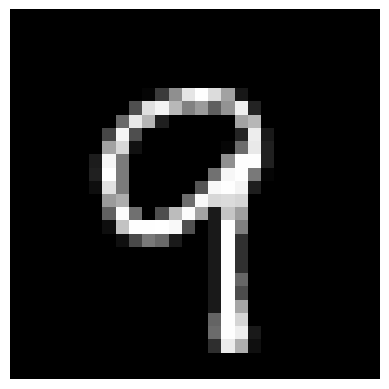

label: is 9, while the true label is 9


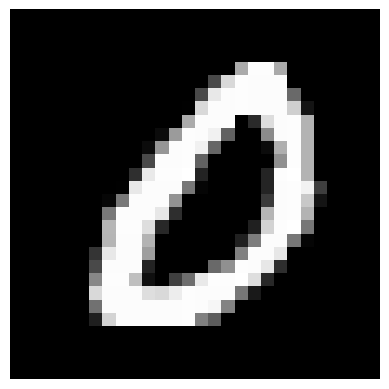

label: is 0, while the true label is 0


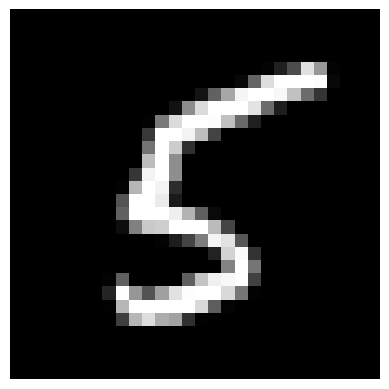

label: is 5, while the true label is 5


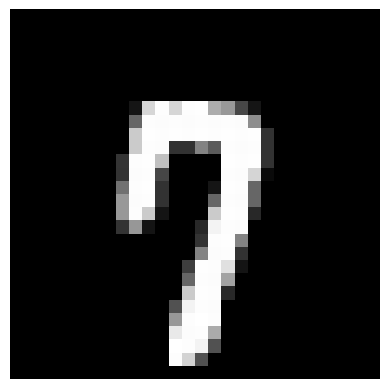

label: is 7, while the true label is 7


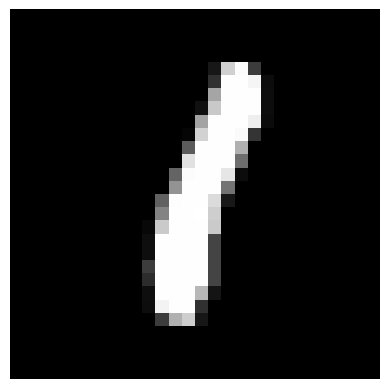

label: is 1, while the true label is 1


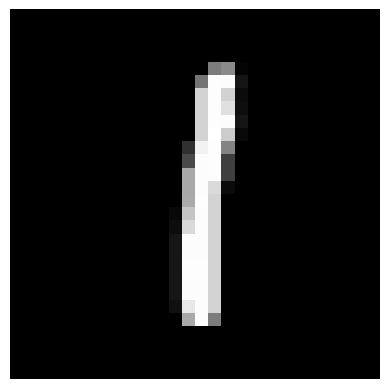

label: is 1, while the true label is 1


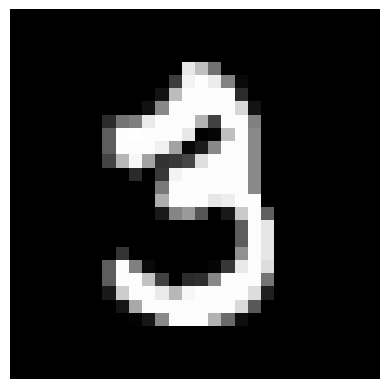

label: is 3, while the true label is 3


In [28]:
import random


def test_one_pic(model, input_img):
    model.eval()
    with torch.no_grad():
        outputs = model(input_img)
        _, predicted = torch.max(outputs, 1)
    plt.imshow(input_img.squeeze(), cmap="gray")
    plt.axis("off")
    plt.show()
    print(f"label: is {predicted.item()}, while the true label is {label.item()}")


# Randomly select one image from test dataset and test it
for i in random.sample(range(len(X_test)), 7):
    img = X_test[i].unsqueeze(0).unsqueeze(0).float()
    label = Y_test[i]
    test_one_pic(model, img)